In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

In [2]:
data = pd.read_csv('../data/cancer_data_cleaned.csv')

1. No categorical variables need classifying - all features numeric and continuous 
2. No complex distributions that need binning.
3. Some distributions could be log-normal? Possibly worth investigating, especially if I'm using hypothesis tests.
4. At this point, there doesn't seem to be any obvious reason to engineer or combine any features. In fact, one of the features, compactness, is itself an engineered feature. 
5. 

In [3]:
features = data.drop(columns = 'diagnosis')
features.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [4]:
#Descriptive statistics summary
features.describe().T

count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se                  569.0   40.337079   45.491006    6.802000   
smoothness_se            569.0    0.007041    0.003003    0.001713   
compactness_se           569.0    0.025478    0.017908    0.002252   
concavity_se             569.0    0.031894    0.030186    0.000000   
concave points_se        569.0    0.011796    0.006170    0.000000   
symmetry_se              569.0    0.020542    0.008266    0.007882   
fractal_dimension_se     569.0    0.003795    0.002646    0.000895   
radius_worst             569.0   16.269190    4.833242    7.930000   
texture_worst            569.0   25.677223    6.146258   12.020000   
perimeter_worst          569.0  107.261213   33.602542   50.410000   
area_worst               569.0  880.583128  569.356993  185.200000   
smoothness_worst         569.0    0.132369    0.022832    0.071170   
compactness_worst        569.0    0.254265    0.157336    0.027290   
concavity_worst          569.0    0.272188    0.208624    0.000000   
concave points_worst     569.0    0.114606    0.065732    0.000000   
symmetry_worst           569.0    0.290076    0.061867    0.156500   
fractal_dimension_worst  569.0    0.083946    0.018061    0.055040   

                                25%         50%          75%         max  
radius_mean               11.700000   13.370000    15.780000    28.11000  
texture_mean              16.170000   18.840000    21.800000    39.28000  
perimeter_mean            75.170000   86.240000   104.100000   188.50000  
area_mean                420.300000  551.100000   782.700000  2501.00000  
smoothness_mean            0.086370    0.095870     0.105300     0.16340  
compactness_mean           0.064920    0.092630     0.130400     0.34540  
concavity_mean             0.029560    0.061540     0.130700     0.42680  
concave points_mean        0.020310    0.033500     0.074000     0.20120  
symmetry_mean              0.161900    0.179200     0.195700     0.30400  
fractal_dimension_mean     0.057700    0.061540     0.066120     0.09744  
radius_se                  0.232400    0.324200     0.478900     2.87300  
texture_se                 0.833900    1.108000     1.474000     4.88500  
perimeter_se               1.606000    2.287000     3.357000    21.98000  
area_se                   17.850000   24.530000    45.190000   542.20000  
smoothness_se              0.005169    0.006380     0.008146     0.03113  
compactness_se             0.013080    0.020450     0.032450     0.13540  
concavity_se               0.015090    0.025890     0.042050     0.39600  
concave points_se          0.007638    0.010930     0.014710     0.05279  
symmetry_se                0.015160    0.018730     0.023480     0.07895  
fractal_dimension_se       0.002248    0.003187     0.004558     0.02984  
radius_worst              13.010000   14.970000    18.790000    36.04000  
texture_worst             21.080000   25.410000    29.720000    49.54000  
perimeter_worst           84.110000   97.660000   125.400000   251.20000  
area_worst               515.300000  686.500000  1084.

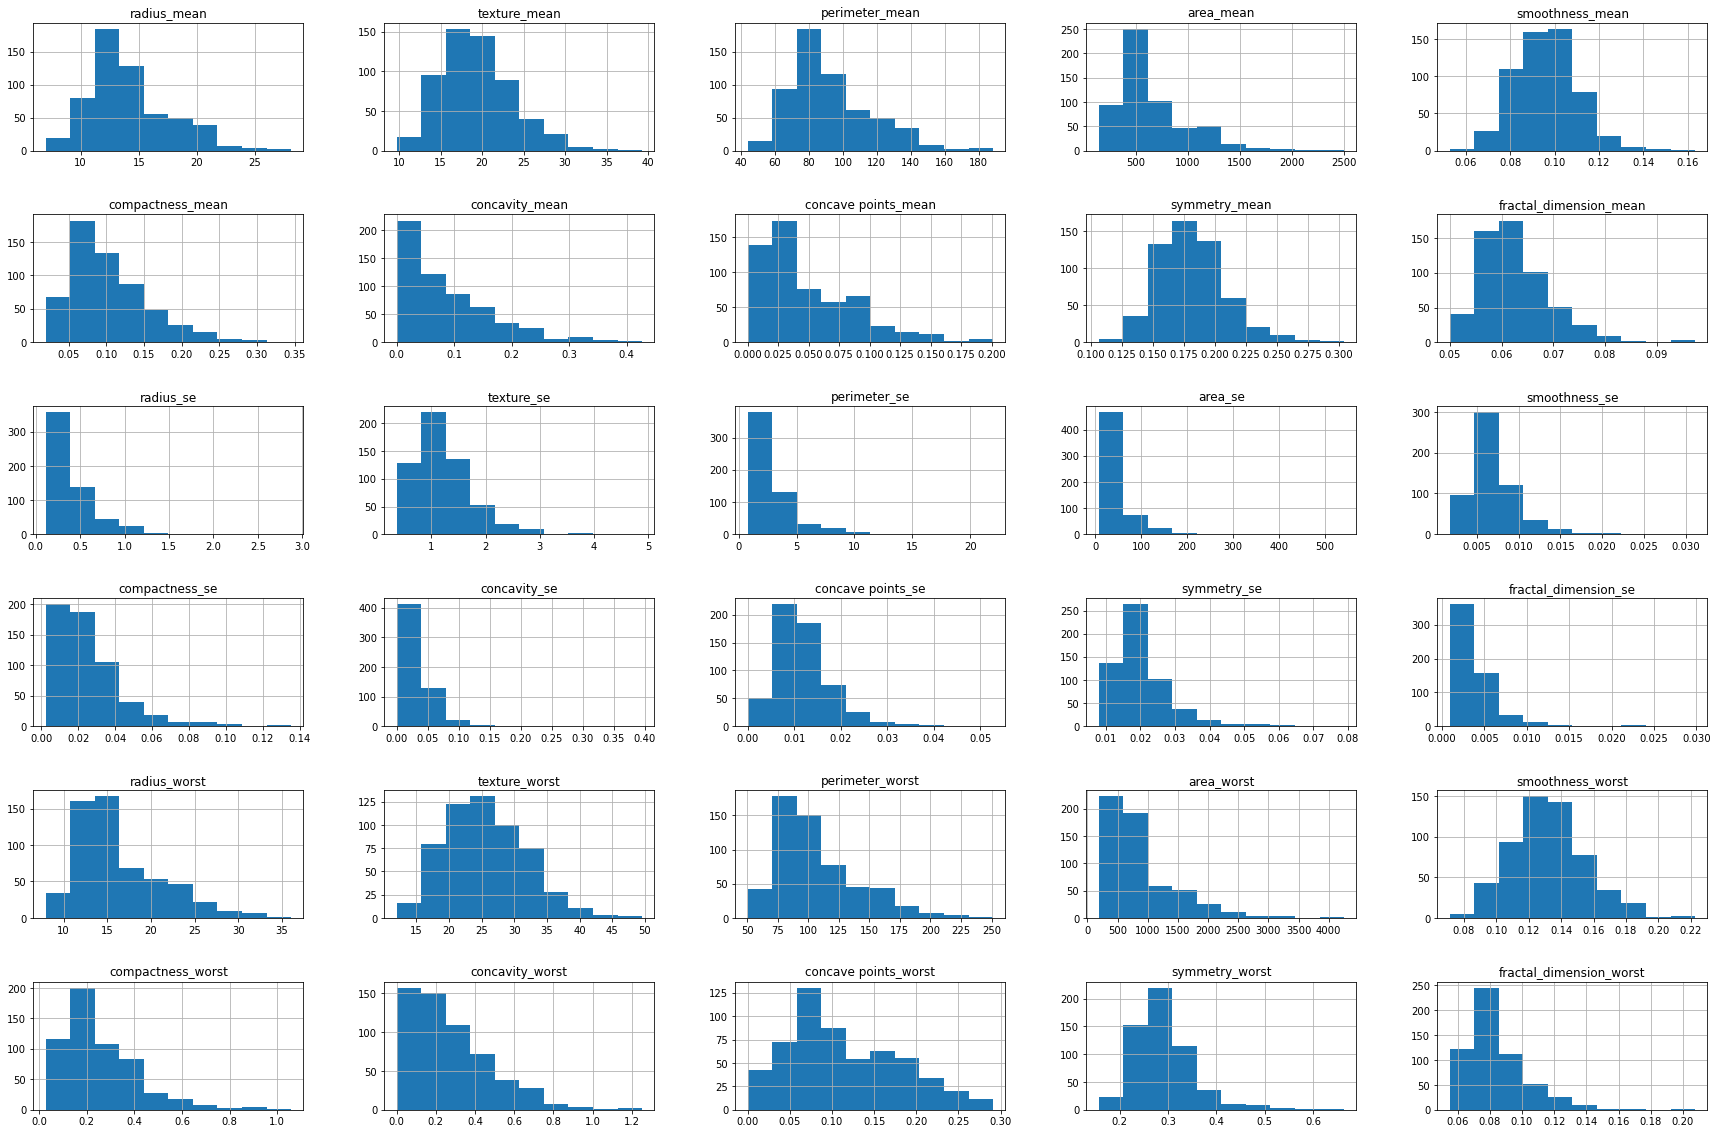

In [14]:
#Next, I want to check the distributions of each individual variable. 
#First, I'll repeat the histograms from the wrangling step
data.hist(figsize=(30,20))
plt.subplots_adjust(hspace=0.5);

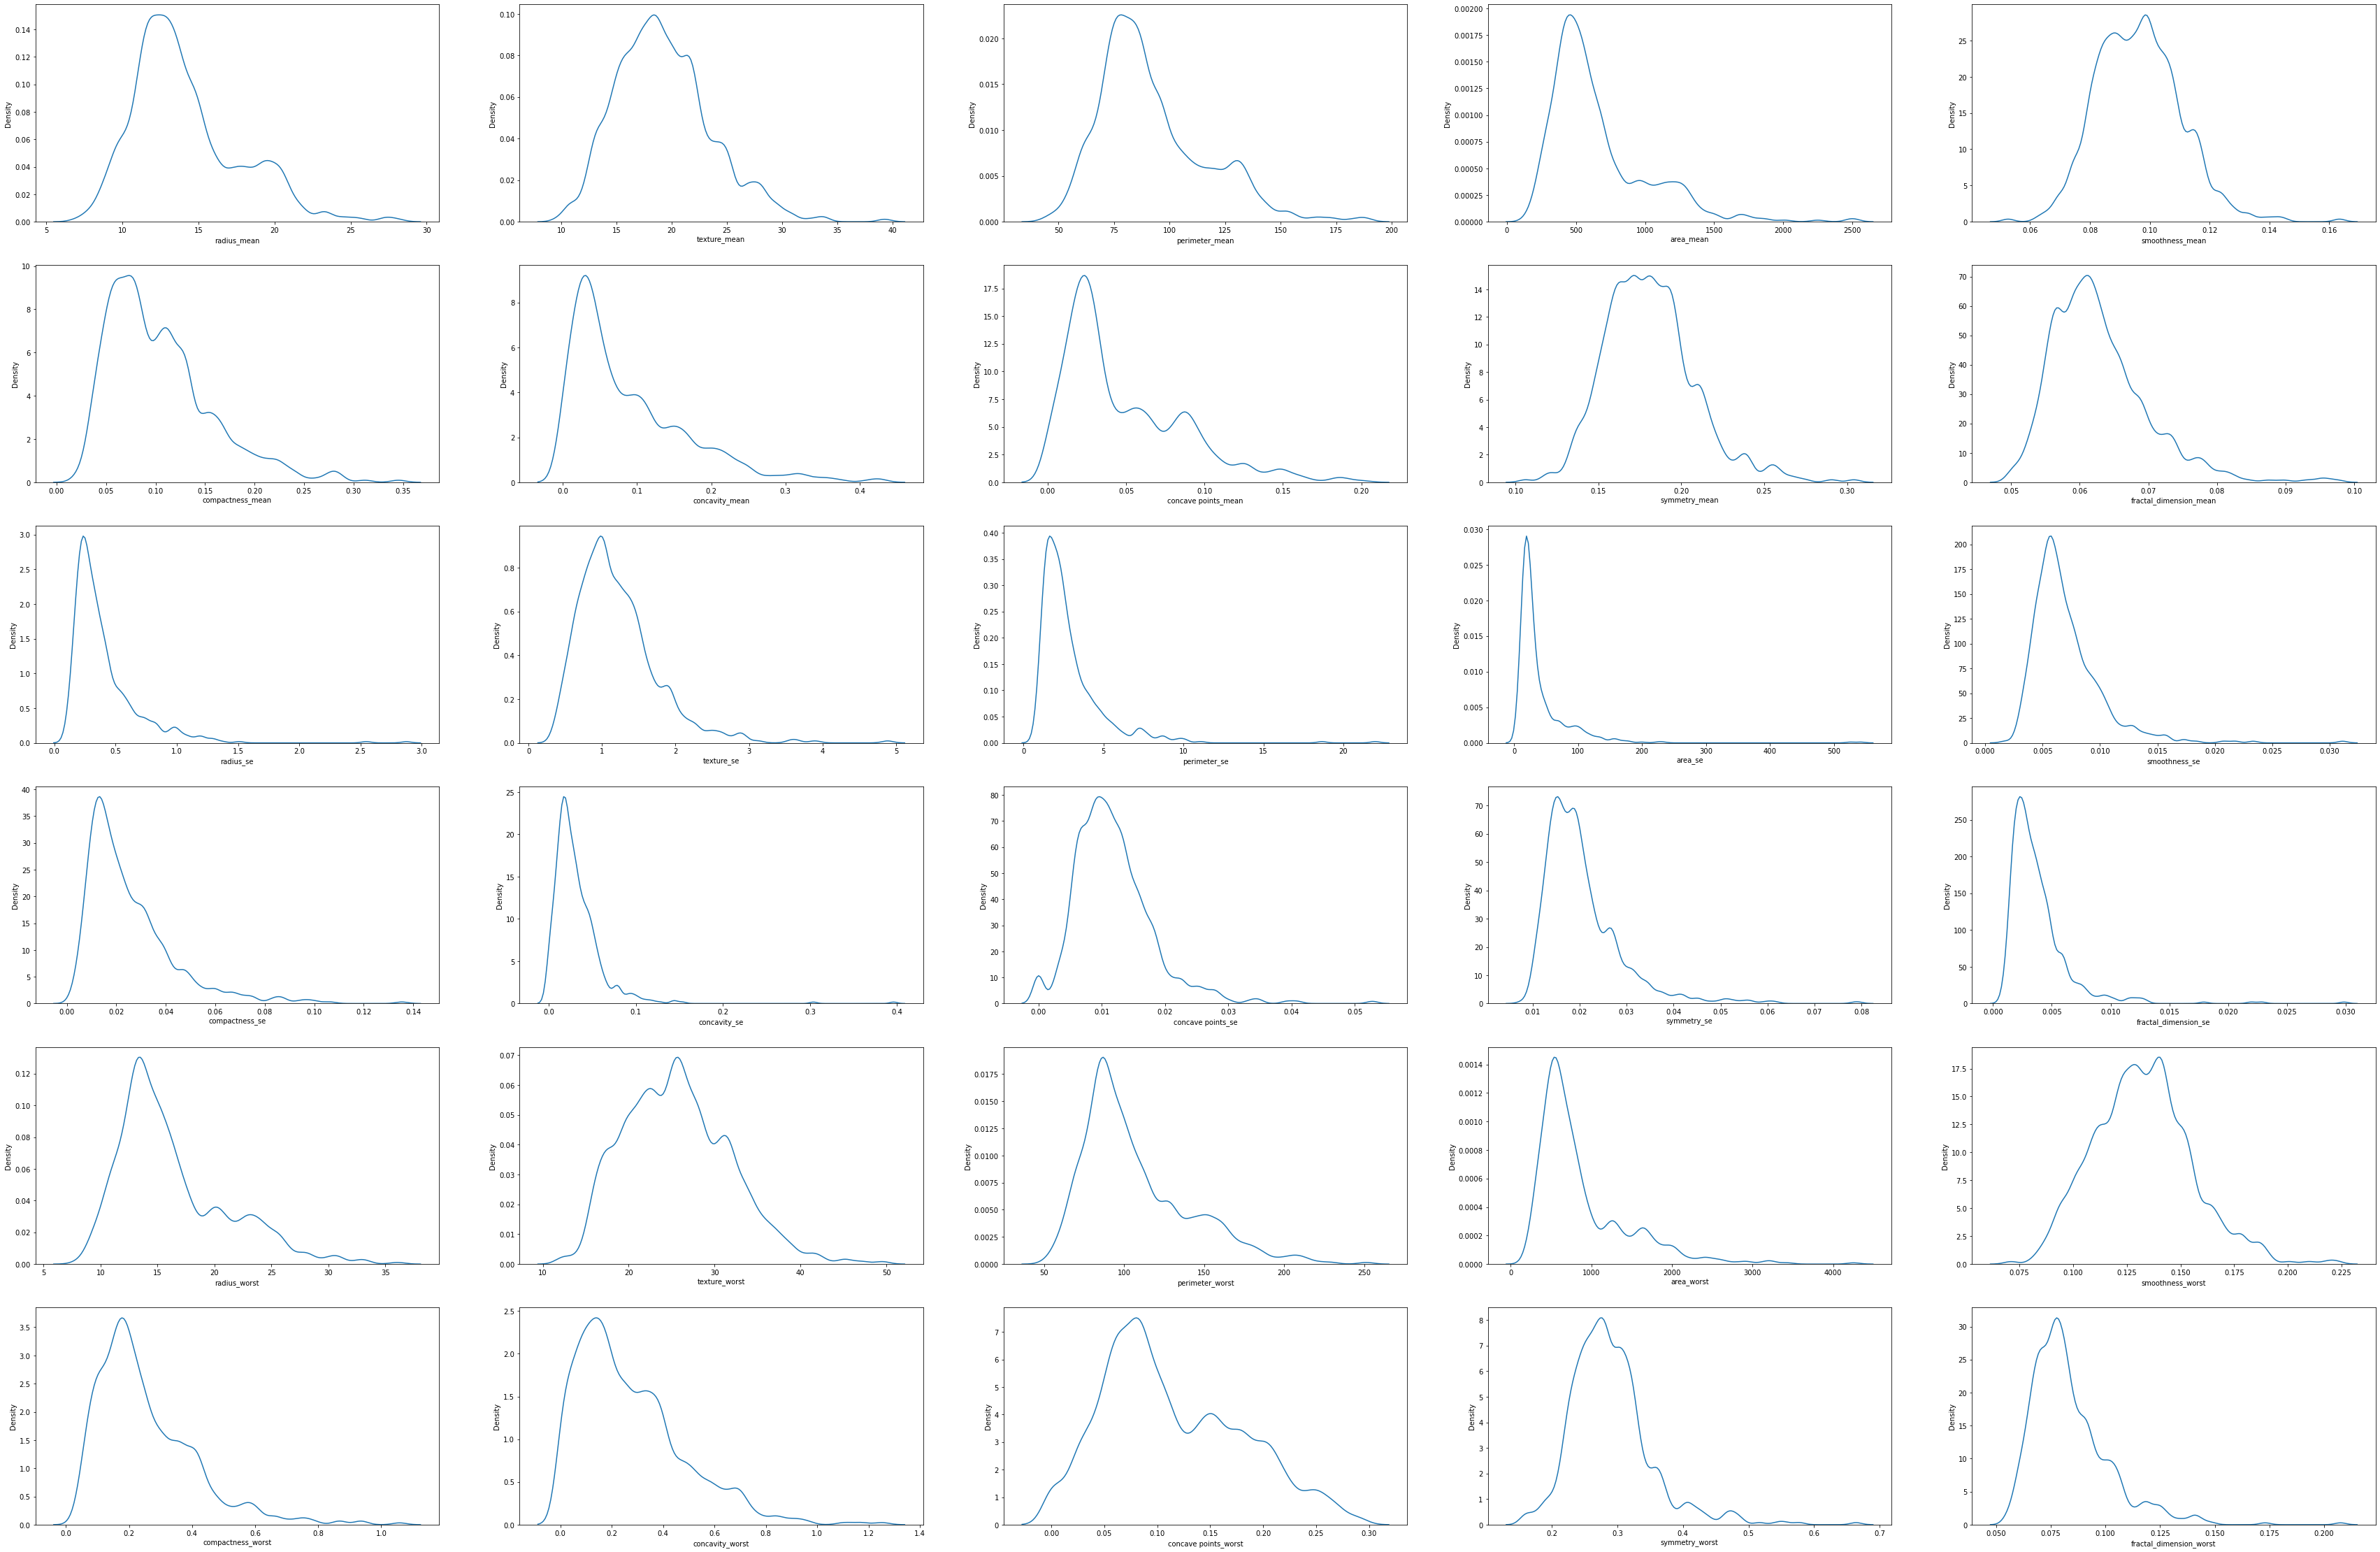

In [15]:
#Next, I'm going to experiment with the KDE plot
fig, ax = plt.subplots(6, 5, figsize=(60,40))
for i, axes in enumerate(ax.flat):        
    _ = sns.kdeplot(x=features.columns[i], data=features, ax = axes, bw_adjust=0.5)
plt.show()

In [128]:
#Lets test if some columns make more sense if we examine the distributions of their logs:

data_log = data.copy()




In [129]:
for col in data_log.columns:
    if col != 'diagnosis':
        data_log[col]  = np.log(data_log[col])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Concave points is a bit interesting in terms of distribution. Also, several variables have rather long tails. Are these due to outliers, or are we observing the dichotomy between benign and malignant cells? 

Next step: compare distributions of 30 features between benign and malignant via violin plots

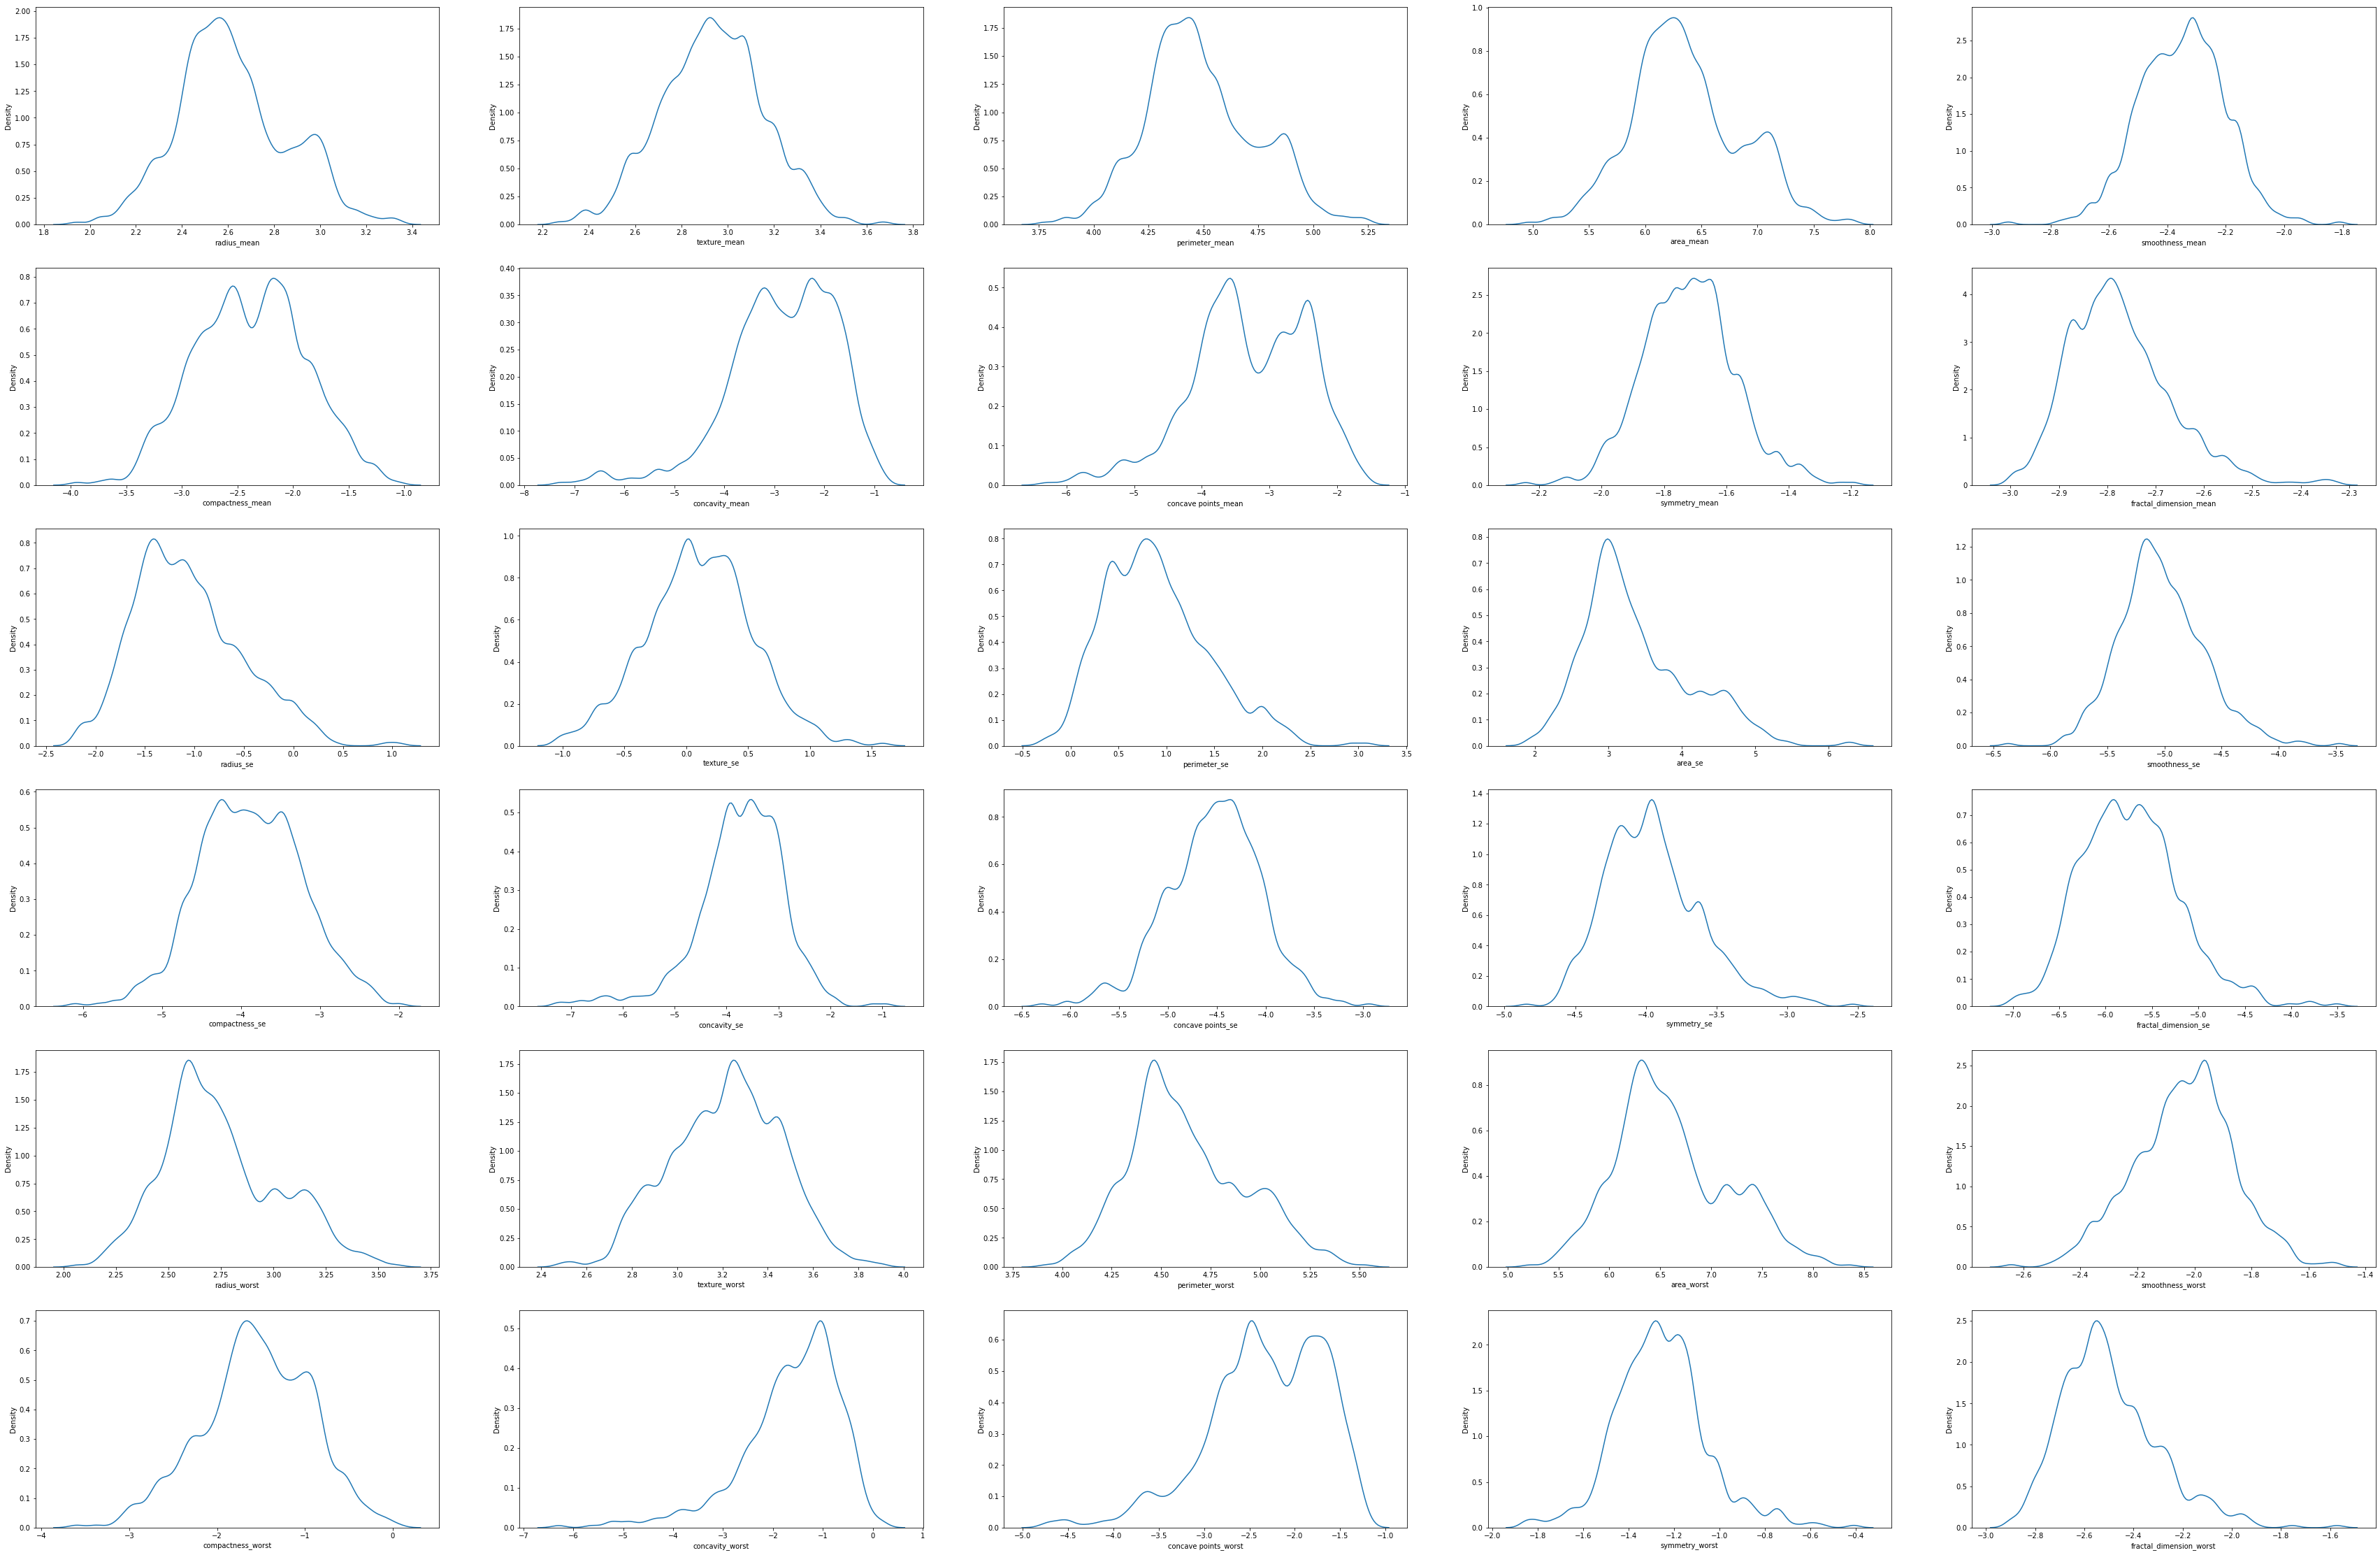

In [133]:
fig, ax = plt.subplots(6, 5, figsize=(60,40))
data_log_x = data_log.drop(columns='diagnosis')
for i, axes in enumerate(ax.flat):        
    _ = sns.kdeplot(x=data_log_x.columns[i], data=data_log_x, ax = axes, bw_adjust=0.5)
plt.show()

Several features might be made more usful if I look at their logs, will investigate further

In [87]:
#Split dataset into 3 groups of features: mean, se, and worst
features_std = (features-features.mean())/features.std()
mean = features_std.iloc[:, 0:10]
mean = pd.concat([data[['diagnosis']], mean], axis=1)
se = features_std.iloc[:, 10:20]
se = pd.concat([data[['diagnosis']], se], axis=1)
worst = features_std.iloc[:, 20:30]
worst = pd.concat([data[['diagnosis']], worst], axis=1)

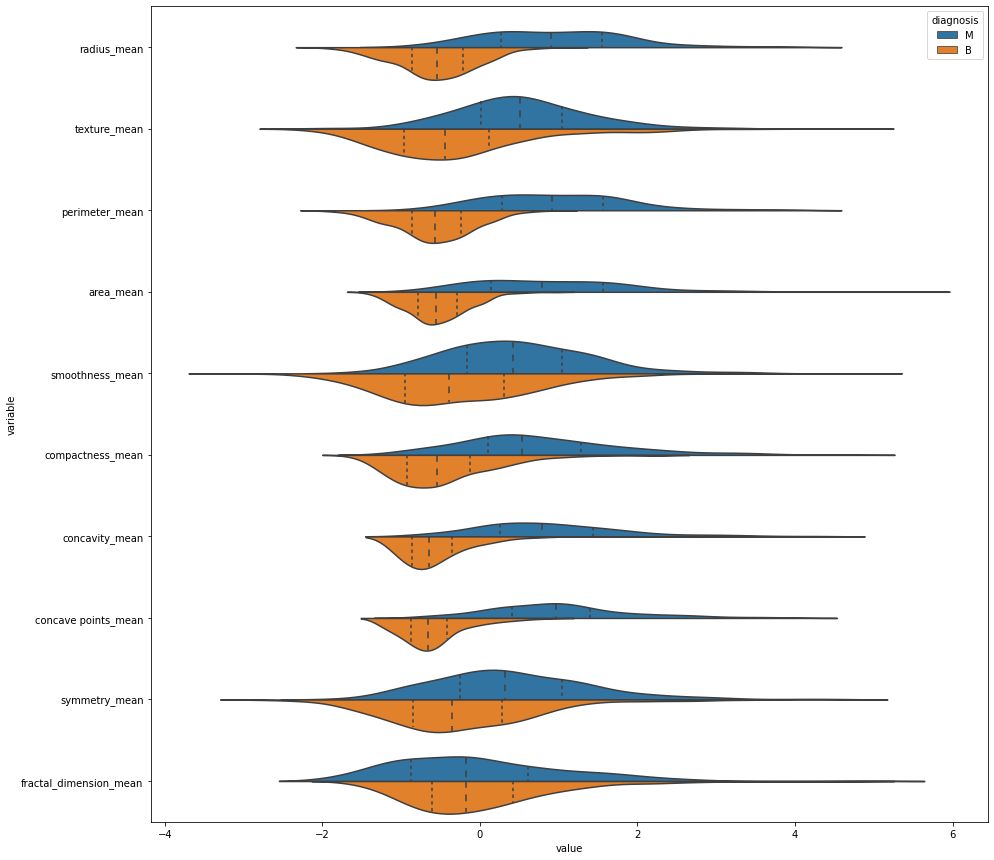

In [114]:
fig = plt.figure(figsize = (15,15))

mean_melt = mean.melt(id_vars="diagnosis")
_ = sns.violinplot(y='variable', x='value', data = mean_melt, hue='diagnosis', split=True, inner='quartile')
ax.tick_params(top=True)
ax.xaxis.set_tick_params(labeltop='on')

plt.show()

Features with large differences between malignant and benign:

-radius_mean

-perimeter_mean

-area_mean

-compactness_mean*

-concavity_mean

Features with smaller differences between malignant and benign (possibly need testing)

-texture_mean

-smothness_mean

-concave points_mean

Features with almost no differences between malignant and benign (similar means, but different spreads):

-fractal_dimension_mean

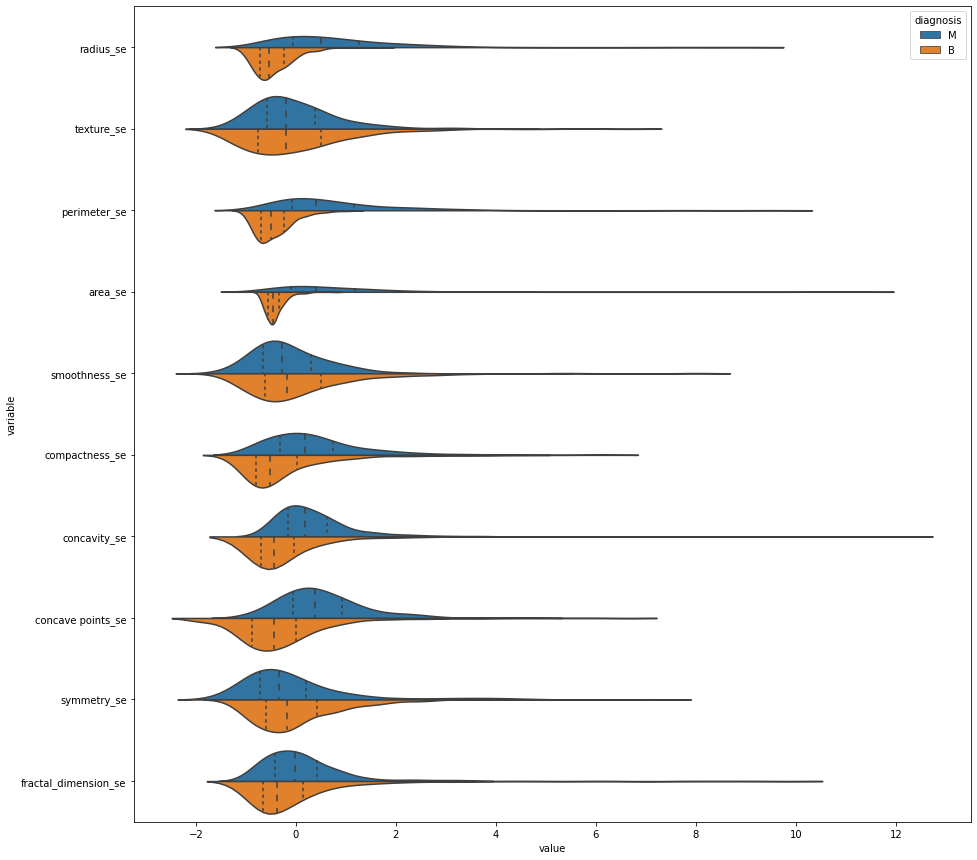

In [115]:
fig = plt.figure(figsize = (15,15))

se_melt = se.melt(id_vars="diagnosis")
_ = sns.violinplot(y='variable', x='value', data = se_melt, hue='diagnosis', split=True, inner='quartile')
ax.tick_params(top=True)
ax.xaxis.set_tick_params(labeltop='on')

plt.show()

Features with large differences between malignant and benign:

-radius_se

-perimeter_se

-area_se

Features with smaller differences between malignant and benign (possibly need testing)

-compactness_se*

-concavity_se

-concave points_se

-fractal_dimension_se

Features with almost no differences between malignant and benign (similar means, but different spreads):

-texture_se

-smoothness_se

-symmetry_se

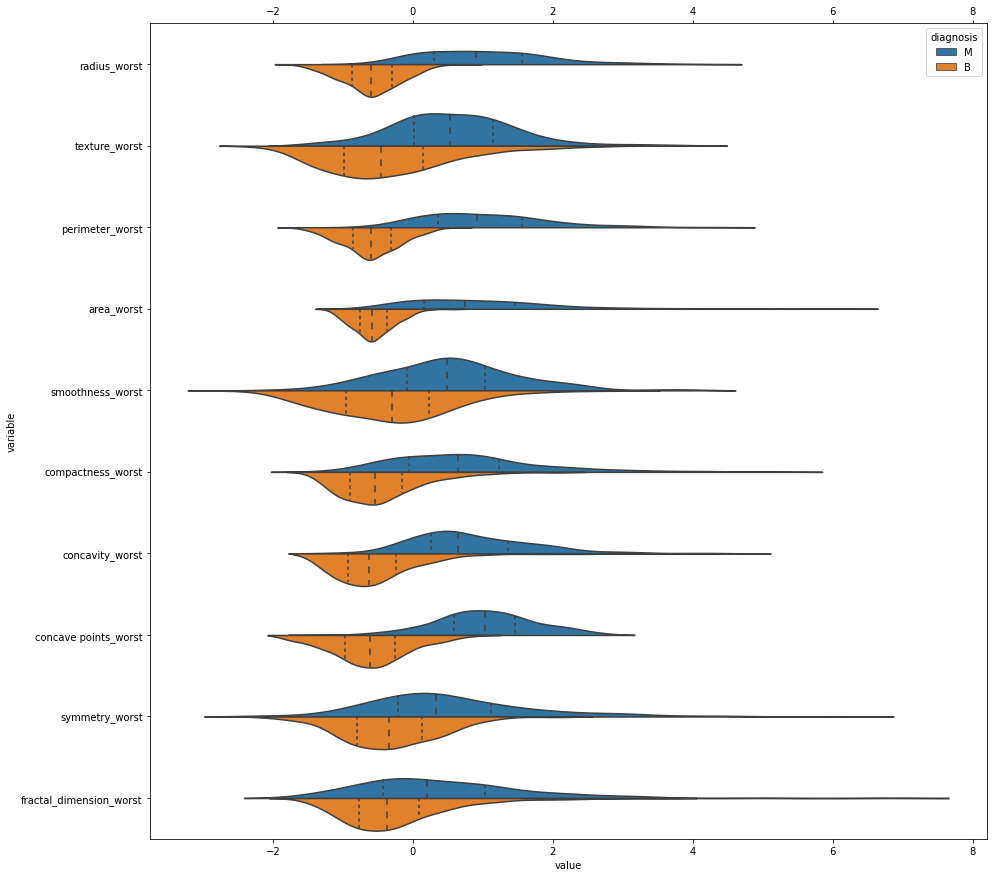

In [113]:
fig, ax = plt.subplots(figsize = (15,15))

worst_melt = worst.melt(id_vars="diagnosis")
_ = sns.violinplot(y='variable', x='value', data = worst_melt, hue='diagnosis', split=True, inner='quartile')
ax.tick_params(top=True)
ax.xaxis.set_tick_params(labeltop='on')

plt.show()

Features with large differences between malignant and benign:

-radius_worst

-perimeter_worst

-area_worst

-compactness_worst*

-concavity_worst

-concave poinst_worst

Features with smaller differences between malignant and benign:

-texture_worst

-smoothness_worst

-symmetry_worst

-fractal_dimension_worst

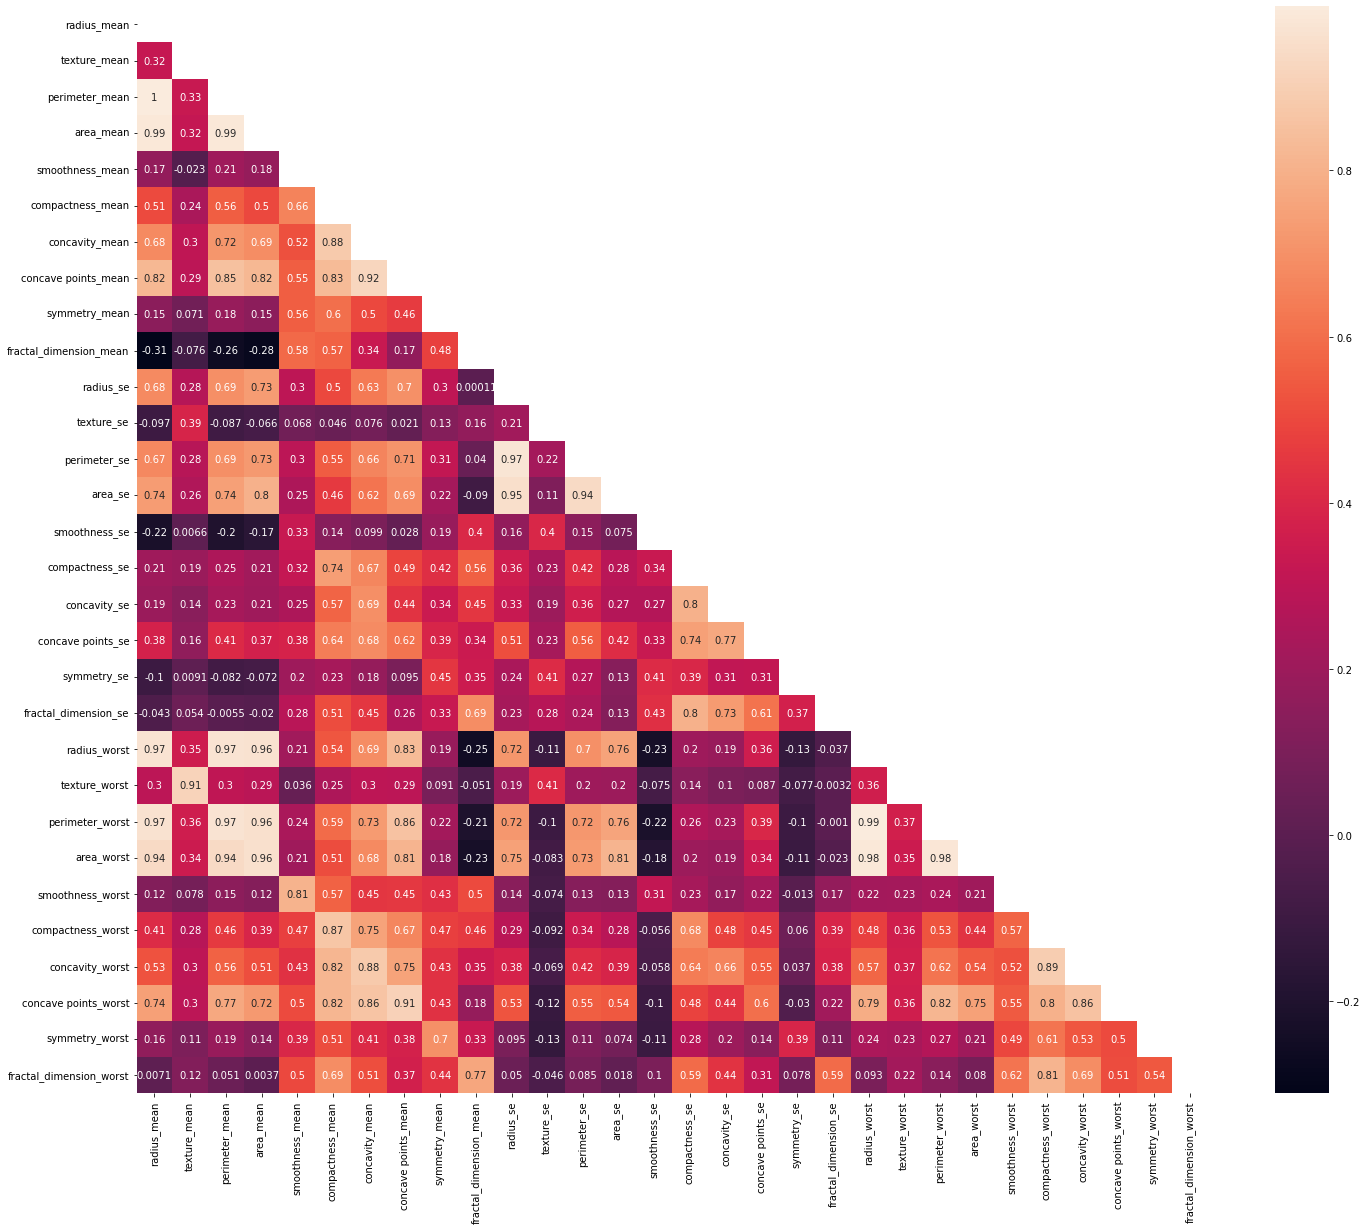

In [145]:
#Time to look at a heatmap

plt.subplots(figsize=(24,20))
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

_ = sns.heatmap(corr, annot=True, mask=mask)
plt.show()

radius_mean is night-perfectly correlated with perimeter_mean, area_mean. It also has high correlation with mean concave points
Relatively strong correlation with standard error for radius, perimeter, and area
it has extremely high correlation with worst radius, area, and perimeter, and high correlation with worst concave points

texture mean and worst are also highly correlated


perimeter mean is extremely highly correlated with area mean, concave points_mean, concavity mean, and area_se (radius and perimeter se are up there too) as well as worst radius, perimeter, and area 
perimeter mean is also fairly highly correlated with worst concave points


concavity mean and concave points mean are extremely highly correlated

There is an absurd amount of multicollinearity in these features